# Medical insurance cost prediction using linear regression



In [1]:
# LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline

### Importing Data Sets


In [2]:
df = pd.read_csv("Downloads/insurance.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df.describe(include = 'all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [7]:
df.shape

(1338, 7)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [10]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Exploratory Data Analysis


Text(0.5, 1.0, 'Gender Distribution')

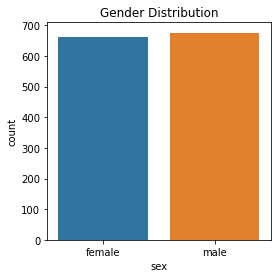

In [11]:
# Countplot to get the count of all the gender
plt.figure(figsize=(4,4))
sns.countplot(x='sex', data=df)
plt.title('Gender Distribution')

Text(0.5, 1.0, 'Smokers')

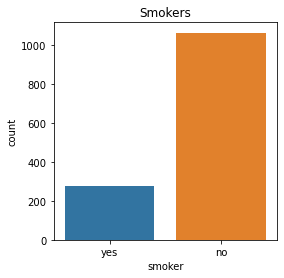

In [12]:
plt.figure(figsize=(4,4))
sns.countplot(x='smoker', data = df)
plt.title('Smokers')

Text(0.5, 1.0, 'Region')

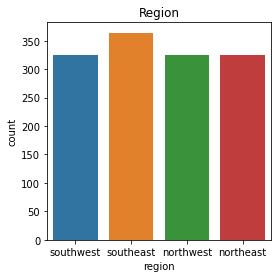

In [13]:
plt.figure(figsize=(4,4))
sns.countplot(x='region', data = df)
plt.title('Region')

Text(0.5, 1.0, 'Cost vs Region')

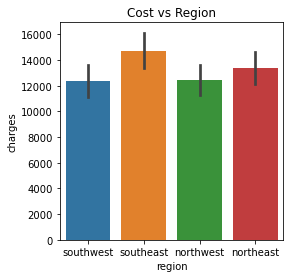

In [14]:
plt.figure(figsize=(4,4))
sns.barplot(x="region", y="charges", data=df)
plt.title('Cost vs Region')

The plot shows that people from Southeast have a higher medical insurance cost

Text(0.5, 1.0, 'Cost for Smokers')

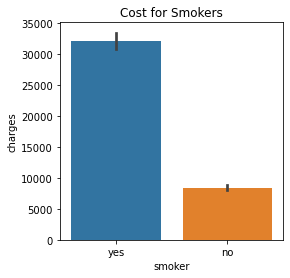

In [15]:
plt.figure(figsize=(4,4))
sns.barplot(x="smoker", y="charges", data=df)
plt.title('Cost for Smokers')

The plot shows that Smokers have a higher medical insurance cost

Text(0.5, 1.0, 'Cost for Smokers')

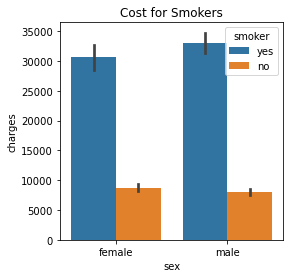

In [16]:
plt.figure(figsize=(4,4))
sns.barplot(x="sex", y="charges",hue='smoker', data=df)
plt.title('Cost for Smokers')

<AxesSubplot:xlabel='region', ylabel='charges'>

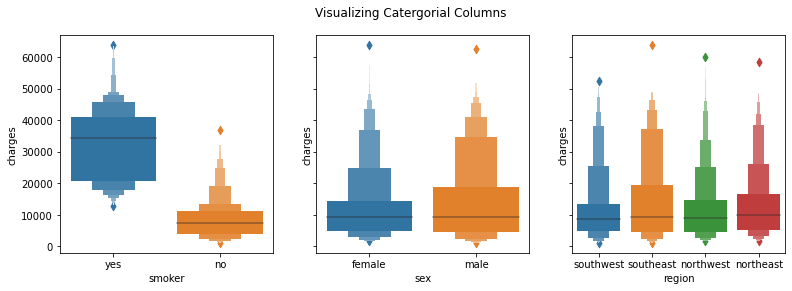

In [17]:
fig, axes = plt.subplots(1,3, figsize =(13, 4), sharey = True)
fig.suptitle('Visualizing Catergorial Columns')
sns.boxenplot(x='smoker', y ='charges', data =df, ax=axes[0])
sns.boxenplot(x='sex', y ='charges', data =df, ax=axes[1])
sns.boxenplot(x='region', y ='charges', data =df, ax=axes[2])

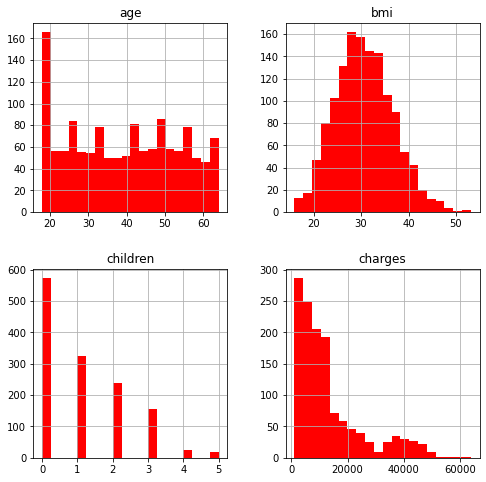

In [18]:
df[['age', 'bmi', 'children', 'charges']].hist(bins=20, figsize=(8,8), color = 'red')
plt.show()

## Coverting categorical variable into numerical format

In [19]:
df['sex'] = df['sex'].apply({'male':0, 'female':1}.get)
df['smoker'] = df['smoker'].apply({'yes':1, 'no':0}.get)
df['region'] = df['region'].apply({'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4}.get)

In [20]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


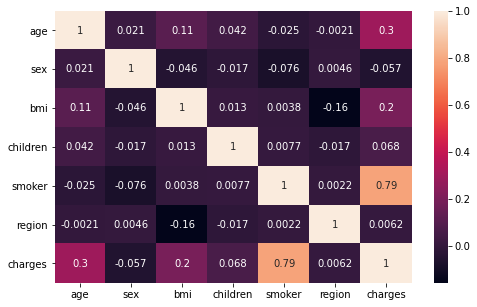

In [21]:
# using heatmap to visualize the correleation between the variables
plt.figure(figsize = (8, 5))
sns.heatmap(df.corr(), annot = True)
plt.show()

# Model Development

In [27]:
X = df.drop(['charges', 'sex'], axis=1)
y = df.charges

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (936, 5)
X_test shape:  (402, 5)
y_train shape:  (936,)
y_test shape:  (402,)


In [30]:
#create linear regression object
lm = LinearRegression()

In [31]:
# Fit the linear model
lm.fit(X_train, y_train)
Y_hat = lm.predict(X_test)

In [35]:
#find R^2
from sklearn.metrics import r2_score
print('The R-square is: ', r2_score(y_test, Y_hat))

The R-square is:  0.7697211527941855


In [ ]:
# PLOT OF PREDICTED VALUES VS ACTUAL VALUES
plt.scatter(y_test, Y_hat)
plt.xlabel('Y Test')
plt.ylabel('Y Pred')
plt.show()

# TESTING THE MODEL

In [45]:
#predicting insurance cost for a new customer
Input = {'age':25, 'bmi':20, 'children':1, 'smoker':0, 'region':2}
index = [0]
df2 = pd.DataFrame(Input, index)
df2

,age,bmi,children,smoker,region
0,25,20,1,0,2


In [46]:
costPred = lm.predict(df2)
print('The insurance cost of the new customer is: ', costPred)

The insurance cost of the new customer is:  [892.08616958]
